# 4. Univariate Imputation (Numeric Features)

Univariate imputation fills missing values in one column at a time using simple statistical or rule-based methods.  
Used when missingness is random or when features can be treated independently.

---

## 4.1 Numeric Features

---

## A. Mean Imputation  
Best for normally distributed numeric features.

### When to Use
- Distribution is symmetric or close to normal.  
- No heavy outliers.  
- Quick baseline imputation.

### When Not to Use
- Skewed distributions.  
- Strong outliers.

### Code
```python
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(strategy='mean')
df['col'] = imp_mean.fit_transform(df[['col']])
```

```python
df['col'] = df['col'].fillna(df['col'].mean())
```

---

## B. Median Imputation  
More robust than mean. Works with skewed data and outliers.

### When to Use
- Skewed numeric features.  
- Outliers present.

### When Not to Use
- Distribution is symmetric (mean is better).

### Code
```python
from sklearn.impute import SimpleImputer

imp_median = SimpleImputer(strategy='median')
df['col'] = imp_median.fit_transform(df[['col']])
```

```python
df['col'] = df['col'].fillna(df['col'].median())
```

---

## C. Random Sample Imputation  
Preserves the original distribution by sampling from non-missing values.

### When to Use
- Maintain variance and distribution.  
- Avoid artificial values.

### When Not to Use
- Very small datasets.

### Code
```python
df['col'] = df['col'].fillna(
    df['col'].dropna().sample(
        df['col'].isnull().sum(),
        replace=True
    ).values
)
```

---

## D. End of Distribution (EoD) Imputation  
Creates an outlier-like value so the model detects missingness.

### When to Use
- Tree-based models (XGBoost, RandomForest, LightGBM).  
- You want missingness to carry a signal.

### When Not to Use
- Linear regression.  
- Long-tailed distributions.

### Code
```python
df['col'] = df['col'].fillna(
    df['col'].mean() + 3 * df['col'].std()
)
```

---

## E. Arbitrary Value Imputation  
Fills missing values with a fixed constant (−999, 9999, 0, etc.).  
Works only when the chosen value does not occur naturally in the feature.

### When to Use
- Want the model to easily detect missingness.  
- Value is guaranteed to be outside the feature's natural range.  
- Ideal for tree models.

### When Not to Use
- Arbitrary value falls within normal feature range.  
- Linear models where extreme values cause distortion.

### Recommended Constants
- −999  
- −1  
- 999  
- Context-specific special numbers  

### Code
```python
arbitrary_value = -999
df['col'] = df['col'].fillna(arbitrary_value)
```

```python
from sklearn.impute import SimpleImputer

imp_arbitrary = SimpleImputer(strategy='constant', fill_value=-999)
df['col'] = imp_arbitrary.fit_transform(df[['col']])
```

---

## Note
Univariate methods ignore relationships between columns.  
For better accuracy, use multivariate methods (KNNImputer, IterativeImputer/MICE) when missingness depends on other features.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

df = pd.read_csv('titanic_toy.csv')

df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [ ]:
df.isnull().mean()

,0
Age,0.198653
Fare,0.050505
Family,0.000000
Survived,0.000000


#USING PANDAS

In [ ]:
x = df.drop(columns=["Survived"])
y = df['Survived']

X_train, X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

X_train.shape, X_test.shape

((712, 3), (179, 3))

In [ ]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

X_train['Age_median'] = X_train['Age'].fillna(median_age)
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)

X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)
X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)

X_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
424,18.0,20.2125,2,18.0,18.0,20.2125,20.2125
7,2.0,21.0750,4,2.0,2.0,21.0750,21.0750
715,19.0,7.6500,0,19.0,19.0,7.6500,7.6500
69,26.0,8.6625,2,26.0,26.0,8.6625,8.6625
821,27.0,8.6625,0,27.0,27.0,8.6625,8.6625


In [ ]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['Age_median'].var())
print('Age Variance after mean imputation: ', X_train['Age_mean'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', X_train['Fare_mean'].var())

Original Age variable variance:  210.2517072477438
Age Variance after median imputation:  169.20731007048096
Age Variance after mean imputation:  168.8519336687225
Original Fare variable variance:  2761.031434948639
Fare Variance after median imputation:  2637.01248167777
Fare Variance after mean imputation:  2621.2323749512393


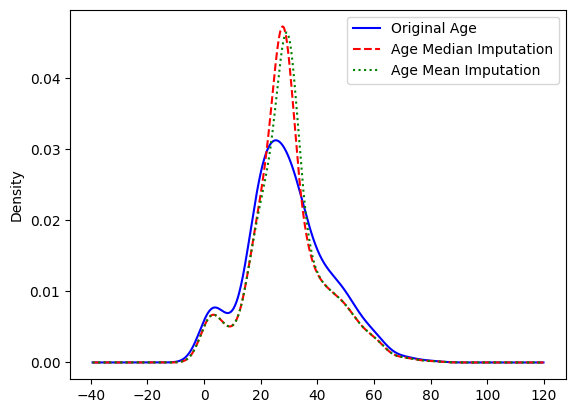

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax, label='Original Age', color='blue', linestyle='-')

# varioble imputed with the median
X_train['Age_median'].plot(kind='kde', ax=ax, color='red', label='Age Median Imputation', linestyle='--')

# varioble imputed with the mean
X_train['Age_mean'].plot(kind='kde', ax=ax, color='green', label='Age Mean Imputation', linestyle=':')

# add Legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc="best")

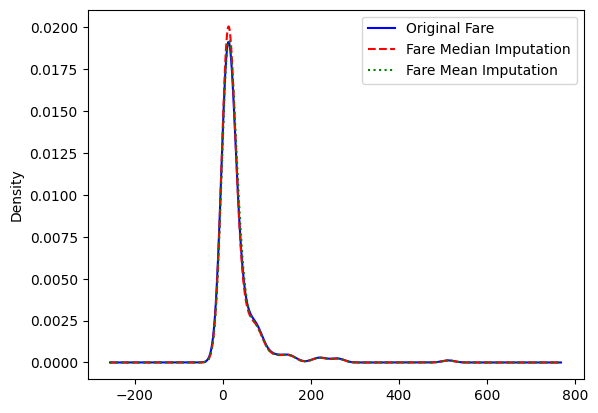

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# originol varioble distribution
X_train['Fare'].plot(kind='kde', ax=ax, label='Original Fare', color='blue', linestyle='-')

# varioble imputed with the median
X_train['Fare_median'].plot(kind='kde', ax=ax, color='red', label='Fare Median Imputation', linestyle='--')

# varioble imputed with the mean
X_train['Fare_mean'].plot(kind='kde', ax=ax, color='green', label='Fare Mean Imputation', linestyle=':')

# add Legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [ ]:
X_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,70.082085,71.193767
Fare,75.481375,2761.031435,18.599163,63.938058,60.224654,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-5.587710,-5.616299,17.672035,17.657433
Age_median,210.251707,63.938058,-5.587710,169.207310,168.851934,59.728510,60.700688
Age_mean,210.251707,60.224654,-5.616299,168.851934,168.851934,56.282518,57.175304
Fare_median,70.082085,2761.031435,17.672035,59.728510,56.282518,2637.012482,2621.232375
Fare_mean,71.193767,2761.031435,17.657433,60.700688,57.175304,2621.232375,2621.232375


In [ ]:
X_train[['Age', "Age_median", "Age_mean"]].cov()

,Age,Age_median,Age_mean
Age,210.251707,210.251707,210.251707
Age_median,210.251707,169.207310,168.851934
Age_mean,210.251707,168.851934,168.851934


<Axes: >

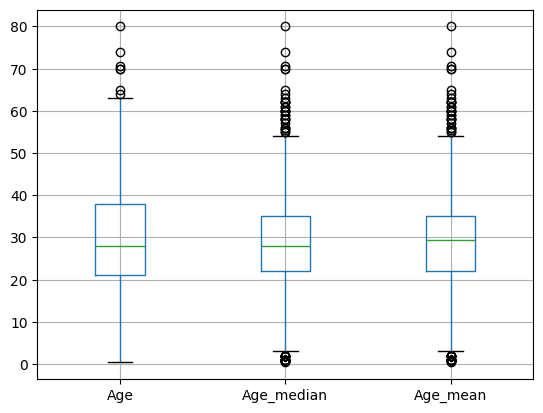

In [ ]:
X_train[['Age', "Age_median", "Age_mean"]].boxplot()

<Axes: >

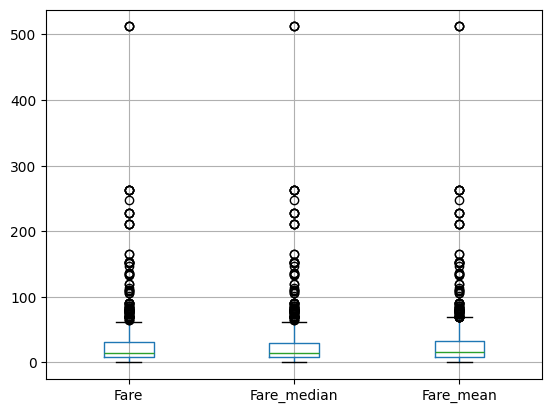

In [ ]:
X_train[['Fare', "Fare_median", "Fare_mean"]].boxplot()

# USING SKLEARN

In [ ]:
X_train, X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

trf = ColumnTransformer([
('imputer1', imputer1, ['Age' ]),
('imputer2', imputer2, ['Fare'])
],remainder='passthrough')

trf.fit(X_train)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [ ]:
trf.named_transformers_['imputer1'].statistics_
trf.named_transformers_['imputer2'].statistics_

array([32.61759689])

In [ ]:
X_train_transformed = trf.transform(X_train)
X_test_transformed = trf.transform(X_test)


In [ ]:
display(X_train.head())

,Age,Fare,Family
30,40.0,27.7208,0
10,4.0,16.7000,2
873,47.0,9.0000,0
182,9.0,31.3875,6
876,20.0,9.8458,0


# 3. Arbitrary Value Imputation

Arbitrary Value Imputation is a missing-value handling technique where we replace missing values with an unusual, clearly artificial value such as **-1**, **99**, **99999**, etc.

This value must *not* naturally occur in the data.

---

## Why it's used
- Very easy to apply.
- Works for both **numerical** and **categorical** variables.
- Helps preserve dataset size (no row deletion).

---

## How it works

### Numerical Columns
You replace missing values with a chosen arbitrary number:

Examples:
- `-1`
- `99`
- `99999`

```python
df['num_col'].fillna(-1, inplace=True)
```

### Categorical Columns
You insert a new artificial category, such as:

- `"Missing"`
- `"Unknown"`
- `"Not Available"`

```python
df['cat_col'].fillna("Missing", inplace=True)
```

---

## Benefits

1. **Easy to apply**  
   No complex statistical assumptions. Works instantly.

---

## Disadvantages (Very Important)

### 1. PDF Distortion (Probability Density Function distortion)
- The distribution becomes skewed because arbitrary values introduce artificial spikes.
- Downstream models relying on distribution (e.g., Gaussian models) get affected.

### 2. Variance Inflation
- Adding extreme values increases variance artificially.
- Models may treat arbitrary values as meaningful extremes.

### 3. Correlation Changes
- Arbitrary numbers create fake relationships with other numerical variables.
- Correlation coefficients become unreliable.

---

## When to use and when to avoid

### Use when:
- You need a **quick baseline model**.
- Missingness itself is informative (e.g., -1 indicates something special).
- Data is not missing at random

### Avoid when:
- You're building a **distribution-sensitive or linear model** (e.g., Linear Regression, Logistic Regression).
- Arbitrary values can mislead algorithms.

---

## Better Alternatives
- Mean/Median Imputation  
- End of Distribution Imputation  
- KNN Imputation  
- MICE  
- Indicator variables + more meaningful imputation

---

## Example

```python
import pandas as pd

df = pd.DataFrame({
    'Age': [25, None, 32, None, 40]
})

# Arbitrary Value Imputation
df['Age'] = df['Age'].fillna(-1)

df
```

**Output:**

| Index | Age |
|-------|-----|
| 0     | 25  |
| 1     | -1  |
| 2     | 32  |
| 3     | -1  |
| 4     | 40  |



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

df = pd.read_csv('titanic_toy.csv')

df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [ ]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)

X_train['Fare_999'] = X_train['Fare'].fillna(999)
X_train['Fare_minus1'] = X_train['Fare'].fillna(-1)

In [ ]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after 99 wala imputation: ', X_train['Age_99'].var())
print('Age Variance after -1 wala imputation: ', X_train['Age_minus1'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after 999 wala imputation: ', X_train['Fare_999'].var())
print('Fare Variance after -1 wala imputation: ', X_train['Fare_minus1'].var())

Original Age variable variance:  204.3495133904614
Age Variance after 99 wala imputation:  951.7275570187172
Age Variance after -1 wala imputation:  318.0896202624484
Original Fare variable variance:  2448.197913706318
Fare Variance after 999 wala imputation:  47219.20265217623
Fare Variance after -1 wala imputation:  2378.5676784883503


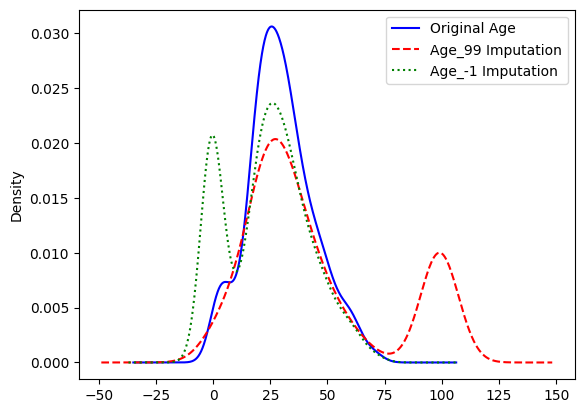

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train["Age"].plot(kind='kde', ax=ax, label='Original Age', color='blue', linestyle='-')

# variable imputed with 99
X_train['Age_99'].plot(kind='kde', ax=ax, color='red', label='Age_99 Imputation', linestyle='--')

# variable imputed with -1
X_train['Age_minus1'].plot(kind='kde', ax=ax, color='green', label='Age_-1 Imputation', linestyle=':')

# add Legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

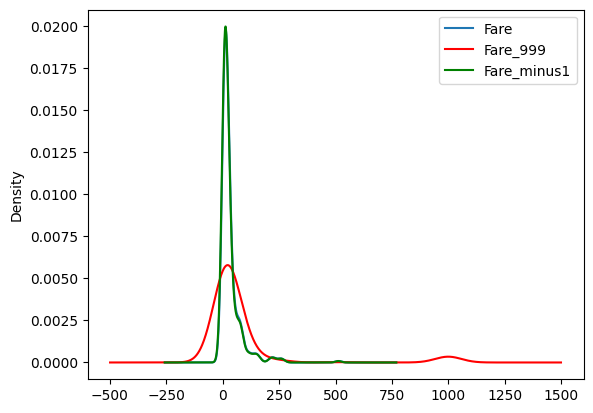

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_999'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_minus1'].plot(kind='kde', ax=ax, color='green')

# add Legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc="best")

Using SKlearn

In [ ]:
X_train, X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

imputer1 = SimpleImputer(strategy='constant', fill_value=99)
imputer2 = SimpleImputer(strategy='constant', fill_value=999)

trf = ColumnTransformer([
('imputeri',imputer1, ['Age']),
('imputer2', imputer2, ['Fare' ])
],remainder='passthrough')

trf.fit(X_train)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputeri',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

# 4. End of Distribution Imputation

End of Distribution Imputation replaces missing values with a number located at the extreme end of the variable’s distribution.  
Instead of inserting an arbitrary value like `-1` or `99999`, we place the imputed values **at the tail (end) of the distribution**.

Common extreme values:
- `mean + 3σ` (for normally distributed data)
- `mean - 3σ`
- 95th or 99th percentile
- Right-tail or left-tail outlier thresholds

This technique preserves *novelty information* and signals the model that a value was originally missing.

---

## Why we do this
Missingness can be informative.  
Instead of collapsing all missing values into a neutral artificial number, we treat them as **extreme events** that sit at the boundary of the feature distribution.

---

## How it works

### For Normally Distributed Variables
If a feature roughly follows a bell-shaped curve, use:

- **Upper extreme:**  
  `mean + 3 * std`

- **Lower extreme (rare):**  
  `mean - 3 * std`

This pushes missing values outside the typical 99.7% range, marking them clearly as “different”.

Example:
```python
df['Age'] = df['Age'].fillna(df['Age'].mean() + 3 * df['Age'].std())
```

---

## For Skewed Distributions (IQR-based)

When the distribution is skewed, mean ± 3σ is unreliable.  
Use the **IQR outlier thresholds** instead:

### Definitions
- `IQR = Q3 - Q1`
- Lower bound:  
  `Q1 - 1.5 * IQR`
- Upper bound:  
  `Q3 + 1.5 * IQR`

These bounds approximate where outliers start. Missing values can be imputed to this end.

Example:
```python
Q1 = df['col'].quantile(0.25)
Q3 = df['col'].quantile(0.75)
IQR = Q3 - Q1
upper_end = Q3 + 1.5 * IQR

df['col'] = df['col'].fillna(upper_end)
```

---

## When this technique is useful
- The missing values themselves contain signal.  
- The model benefits from identifying “rare/extreme/missing” values.
- Tree-based models (Random Forest, XGBoost, LightGBM) tolerate this technique very well.

---

## When to avoid it
- Linear or logistic regression models (may be distorted by extreme numbers).
- When the distribution is extremely irregular and tail estimation becomes unreliable.
- When missingness is random and not meaningful.

---

## Advantages
1. Preserves dataset size.  
2. Captures *missingness* as a potential signal.  
3. Works well with ML models that can split on extreme values.

---

## Disadvantages
1. May distort the distribution further.  
2. Variance may increase artificially.  
3. Correlation with other variables can be affected.  
4. If tails are poorly defined, imputation may be unstable.

---

## Example Demonstration

```python
import pandas as pd

df = pd.DataFrame({
    'Income': [50, 60, 55, None, 70, None, 65]
})

Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

upper_end = Q3 + 1.5 * IQR

df['Income'] = df['Income'].fillna(upper_end)
